### Dataset using Twitter data, is was used to research hate-speech detection. The text is classified as: hate-speech, offensive language, and neither. Due to the nature of the study, it’s important to note that this dataset contains text that can be considered racist, sexist, homophobic, or generally offensive.

In [72]:
import pandas as pd
import numpy as np

#visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#eda library
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

#models
from keras.models import Model
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
# from tensorflow.keras.losses imporserialize 
from tensorflow.keras.layers import Convolution2D,LSTM,Activation,Embedding,Dense,Dropout,Input,SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.optimizers import RMSprop
from keras.utils import to_categorical ,pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
import string
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer,CountVectorizer
from keras.callbacks import EarlyStopping,ModelCheckpoint



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ISF\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
data=pd.read_csv('labeled_data.csv')

In [40]:
data

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [41]:
data.isna().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [42]:
data.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [43]:
data.drop(columns=['Unnamed: 0','count','offensive_language','neither','hate_speech'],inplace=True)

In [44]:
data

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


<Axes: xlabel='class', ylabel='count'>

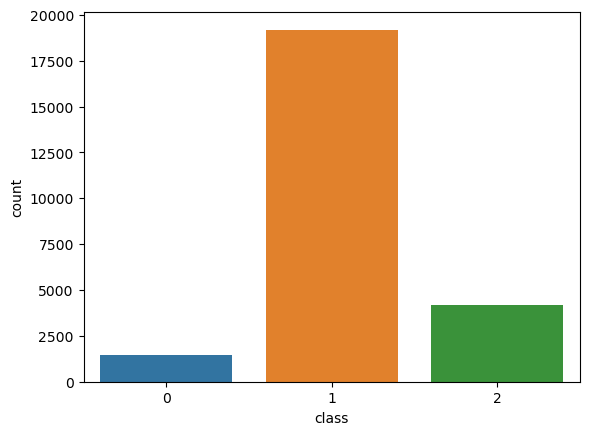

In [45]:
sns.countplot(data,x='class')

In [46]:
data['class'].unique()

array([2, 1, 0], dtype=int64)

In [47]:
data['class'].value_counts()

1    19190
2     4163
0     1430
Name: class, dtype: int64

In [48]:
data

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


In [49]:
data[data['class']==0]

,class,tweet
85,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy1..."
89,0,"""@CB_Baby24: @white_thunduh alsarabsss"" hes a ..."
110,0,"""@DevilGrimz: @VigxRArts you're fucking gay, b..."
184,0,"""@MarkRoundtreeJr: LMFAOOOO I HATE BLACK PEOPL..."
202,0,"""@NoChillPaz: ""At least I'm not a nigger"" http..."
...,...,...
24576,0,this guy is the biggest faggot omfg
24685,0,which one of these names is more offensive kik...
24751,0,you a pussy ass nigga and I know it nigga.
24776,0,you're all niggers


In [50]:
data['tweet'][89]

'"@CB_Baby24: @white_thunduh alsarabsss" hes a beaner smh you can tell hes a mexican'

In [51]:
data[data['class']==2]

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
40,2,""" momma said no pussy cats inside my doghouse """
63,2,"""@Addicted2Guys: -SimplyAddictedToGuys http://..."
66,2,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" woo..."
67,2,"""@Allyhaaaaa: Lemmie eat a Oreo &amp; do these..."
...,...,...
24736,2,yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...
24737,2,yea so about @N_tel 's new friend.. all my fri...
24767,2,"you know what they say, the early bird gets th..."
24779,2,"you've gone and broke the wrong heart baby, an..."


In [52]:
data['tweet'][67]

'"@Allyhaaaaa: Lemmie eat a Oreo &amp; do these dishes." One oreo? Lol'

In [53]:
#replacing o with 1 becoze they are in same category like hate 
data['class'].replace({1:0},inplace=True)

In [54]:
data['class'].value_counts()

0    20620
2     4163
Name: class, dtype: int64

In [55]:
data['class'].replace({2:1},inplace=True)

In [56]:
data['class'].value_counts()

0    20620
1     4163
Name: class, dtype: int64

In [57]:
# stopwords

In [58]:
stopwords =set(stopwords.words('english'))

In [59]:
stemmer=PorterStemmer()

## cleaning the tweets

In [60]:
def clean_data(words):
    words=str(words).lower()
    words=re.sub('\[.*?\]','',words)
    words=re.sub('https:?://\S+|','',words)
    words=re.sub('<.*?>+','',words)
    words=re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words=re.sub('\n', '', words)
    words=re.sub('\w*\d\w*', '', words)
    words=[word for word in words.split(' ') if words not in stopwords]
    words=' '.join(words)
    words=[stemmer.stem(words) for word in words.split(' ')]
    words=' '.join(words)
    
    return words

In [61]:
df=data.copy()

In [62]:
df['tweet']=df['tweet'].apply(clean_data)

In [63]:
df['tweet'][3]

' rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni  rt cganderson vivabased she look like a tranni'

In [64]:
df.shape

(24783, 2)

### we are splitting data in to x and y

In [65]:
x=df['tweet']
y=df['class']

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=7)

In [67]:
len(x_train)

18587

In [68]:
len(x_test)

6196

In [69]:
y_train.shape

(18587,)

In [70]:
x_train

8271     butler unchained review httptcohxyyujmorm shor...
5813     darrenburton and take the trash out and separa...
11588    if these hoes aint lying about being fat they ...
11994    its arabspring training charlie brown rejected...
17500    rt swizzzy i know she a hoe if she believe in ...
                               ...                        
919      truefriendtuesday my bitch drrrruuuu  truefrie...
20691    sex should be a reward in a relationship nigga...
5699      madisonearhart u guys are fag  madisonearhart...
10742    i made ya bitch sicc wit that one  i made ya b...
16921    rt polliepopthadj hahahaha he missed the shit ...
Name: tweet, Length: 18587, dtype: object

In [73]:
max_words=50000
max__len=300

In [ ]:
model=Sequential()
model.add(Embedding(input_dim=max_words,output_dim=100,input_length=max_len,))
model.add(LSTM(100,activation='relu',))